### 1)

a)

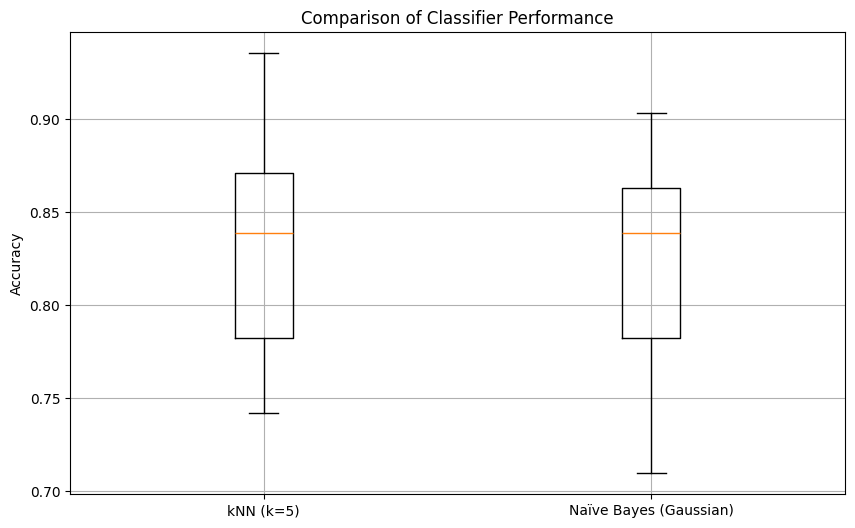

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from scipy.io import arff
from scipy import stats

# Load the dataset
data = arff.loadarff('column_diagnosis.arff')
df = pd.DataFrame(data[0])

# Store the class names in a variable
class_names = df['class'].unique()
class_names = [name.decode('utf-8') for name in class_names]


# Convert the target column to numeric labels
le = LabelEncoder()
df['class'] = le.fit_transform(df['class'])

# Split the dataset into features and target labels
X = df.drop('class', axis=1)
y = df['class']

# Create classifiers
knn_classifier = KNeighborsClassifier(n_neighbors=5)
nb_classifier = GaussianNB()

# Create 10-fold stratified cross-validation with shuffling
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)

# Perform cross-validation and collect accuracies
knn_accuracies = cross_val_score(knn_classifier, X, y, cv=cv, scoring='accuracy')
nb_accuracies = cross_val_score(nb_classifier, X, y, cv=cv, scoring='accuracy')

# Create a boxplot to compare accuracies
plt.figure(figsize=(10, 6))
plt.boxplot([knn_accuracies, nb_accuracies], labels=['kNN (k=5)', 'Naïve Bayes (Gaussian)'])
plt.title('Comparison of Classifier Performance')
plt.ylabel('Accuracy')
plt.grid()
plt.show()


b)

In [29]:
t_statistic, p_value = stats.ttest_rel(knn_accuracies, nb_accuracies)

# Significance level
alpha = 0.05

if p_value < alpha:
    print("Reject the null hypothesis")
    print("kNN is statistically superior to Naïve Bayes regarding accuracy.")
else:
    print("Fail to reject the null hypothesis")
    print("There is no statistically significant difference between kNN and Naïve Bayes regarding accuracy.")
    

print(f"t-statistic: {t_statistic}")
print(f"p-value: {p_value}")

Fail to reject the null hypothesis
There is no statistically significant difference between kNN and Naïve Bayes regarding accuracy.
t-statistic: 0.9214426752509264
p-value: 0.38085618124128184


### 2)

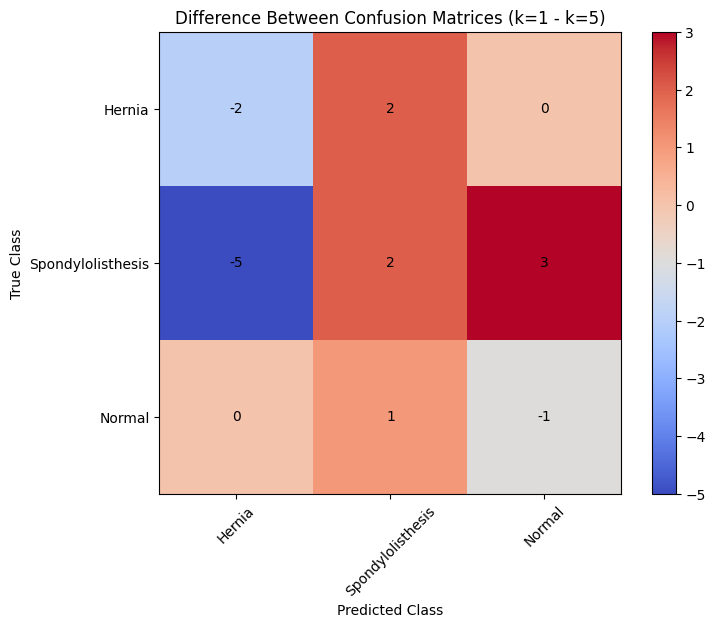

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_predict
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

# Create kNN classifiers with k=1 and k=5
knn_k1 = KNeighborsClassifier(n_neighbors=1, weights='uniform', metric='euclidean')
knn_k5 = KNeighborsClassifier(n_neighbors=5, weights='uniform', metric='euclidean')

# Cross-validation
y_pred_k1 = cross_val_predict(knn_k1, X, y, cv=cv)
y_pred_k5 = cross_val_predict(knn_k5, X, y, cv=cv)

# Confusion matrices for both kNN classifiers
conf_matrix_k1 = confusion_matrix(y, y_pred_k1)
conf_matrix_k5 = confusion_matrix(y, y_pred_k5)

# Difference between the two confusion matrices
conf_matrix_difference = conf_matrix_k1 - conf_matrix_k5

# Plot the difference between the two cumulative confusion matrices
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix_difference, cmap='coolwarm', interpolation='nearest')

# Annotate each square with the number
for i in range(len(class_names)):
    for j in range(len(class_names)):
        plt.text(j, i, str(conf_matrix_difference[i, j]), va='center', ha='center', color='black')

plt.colorbar()
plt.title('Difference Between Confusion Matrices (k=1 - k=5)')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.xticks(np.arange(len(class_names)), class_names, rotation=45)
plt.yticks(np.arange(len(class_names)), class_names)

plt.show()


The diagonal elements of the matrix represent the true positives.
  - Positive values indicate cases where k=1 performed better than k=5, with more correct classifications.

Off-diagonal elements represent the differences in misclassifications between the two classifiers.
   - Negative values indicate cases where k=1 performed better than  k=5, having fewer misclassifications.

For Spondylolisthesis, the kNN classifier with k=1 outperforms the one with k=5 as it has more correct predictions and fewer misclassifications.

For Hernia Normal class, the kNN classifier with k=5 has a slight edge in terms of correct predictions.

If correctly classifying Spondylolisthesis is more critical, then k=1 is preferable. However, if balanced performance across all classes is preferred, k=5 may be a better choice as it reduces misclassifications for other classes.

### 3)

1. Naïve Bayes assumes that the features are independent from one another given the class label. However, that might not be the case in column_diagnosis since most of the times, medical terms or symptoms may be related ("pelvic_incidence" "pelvic_tilt") , therefore assuming their independence won't hold in real-world medical data,leading to bad performance since the model can't capture those complex relationships between features.

2. In column_diagnosis, Spondylolisthesis is much more common than Hernia. This means the classes are imbalanced and naïve Bayes might be biased towards the more common class and might struggle to accurately classify the minority class, which can result in a poor predictive performance.

3. Naïve Bayes works best with discrete or categorical data. However, in column_diagnosis all data is numerical, so we would need to discretize the data to use the model to it's fullest potential, but this can lead to information loss and may affect the performance of the model.
As for continuous features, Naïve Bayes assumes they follow a Normal distribution. In this dataset, the distribution of some features are not that well aproximated by the normal distribution like "degree_spondylolisthesis", and modeling them as such can lead to inaccurate predictions.

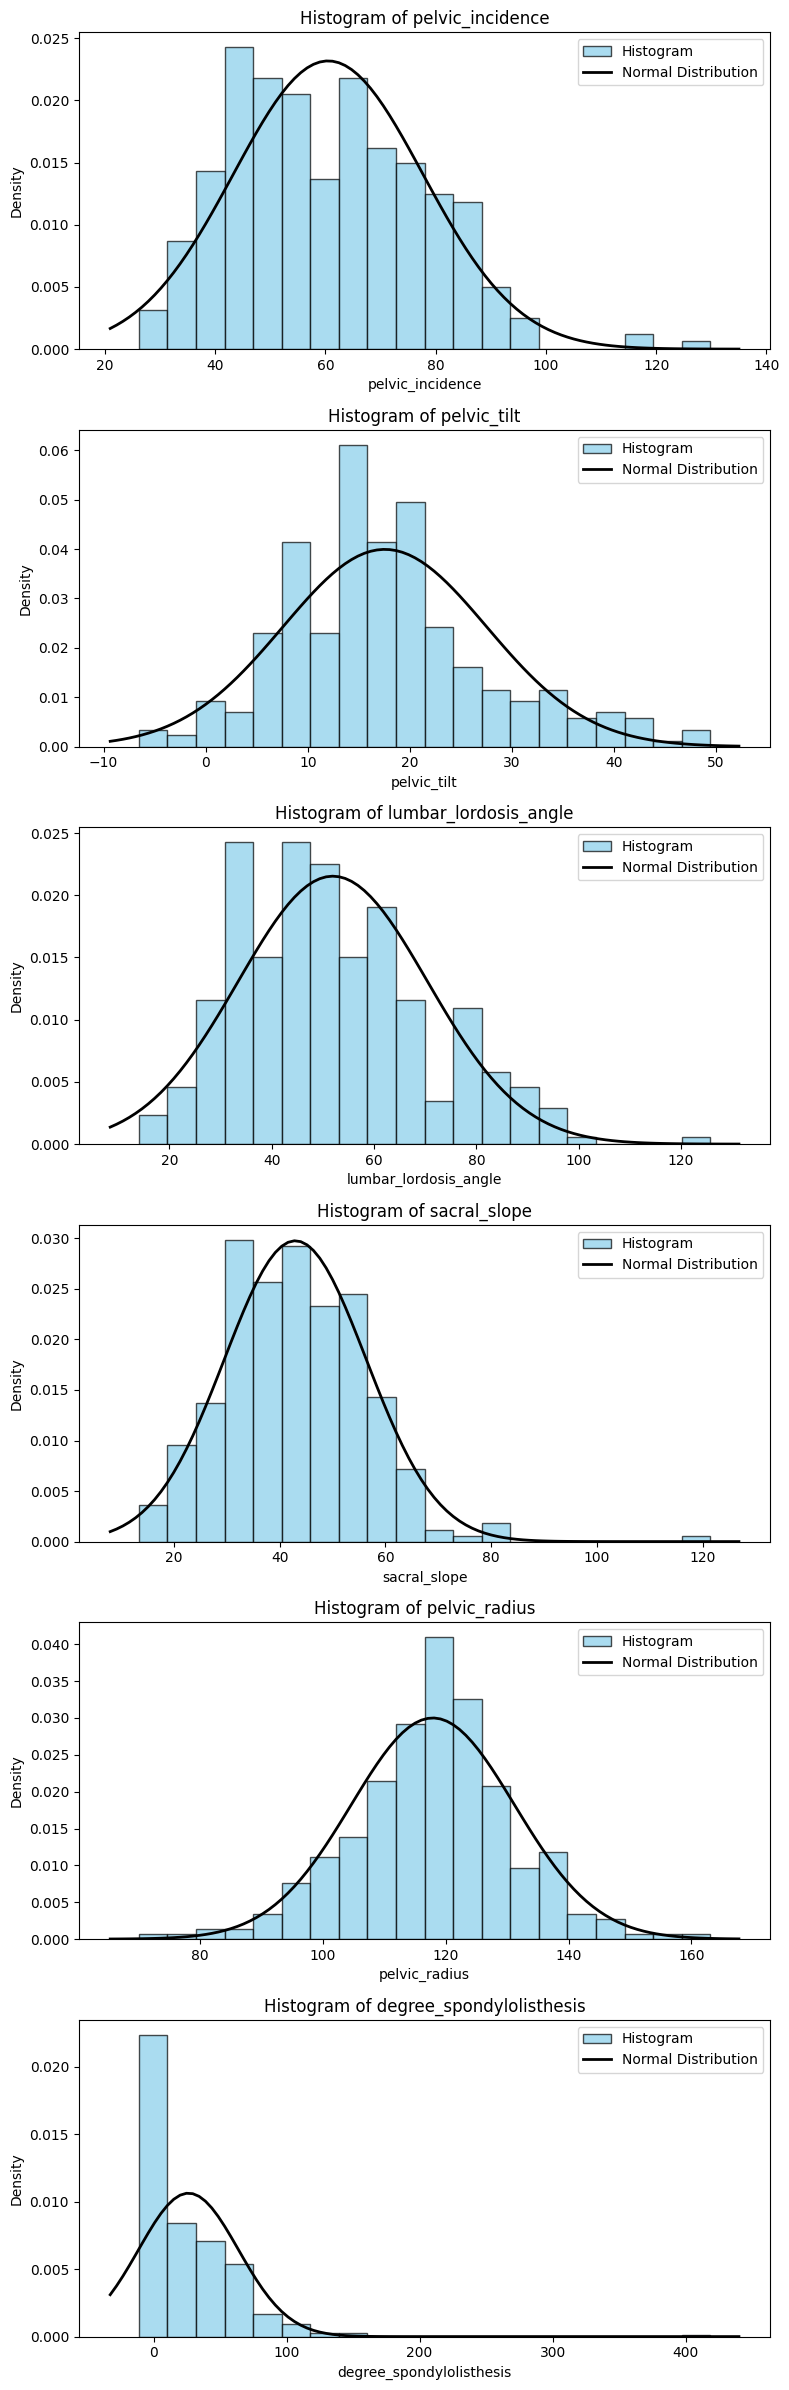

In [34]:
from scipy.stats import norm

feature_columns = df.columns[:-1]

# Create subplots for each feature
num_features = len(feature_columns)
fig, axes = plt.subplots(nrows=num_features, ncols=1, figsize=(8, 4 * num_features))


# Plot histograms for each feature
for i, feature in enumerate(feature_columns):
    ax = axes[i]
    ax.hist(df[feature], bins=20, density=True, color='skyblue', edgecolor='black', alpha=0.7, label='Histogram')
    ax.set_title(f'Histogram of {feature}')
    ax.set_xlabel(feature)
    ax.set_ylabel('Density')

    # Overlay a standard normal distribution curve
    mu, std = norm.fit(df[feature])
    xmin, xmax = ax.get_xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    ax.plot(x, p, 'k', linewidth=2, label='Normal Distribution')
    ax.legend()

plt.tight_layout()
plt.show()